Importamos las librerias necesarias:

In [1]:
#!pip install shapely
import json
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from skimage.feature import canny
from collections import defaultdict
from PIL import Image
from skimage.color import rgba2rgb, rgb2gray
from skimage.feature import local_binary_pattern
from itertools import combinations
from shapely.geometry import box
from shapely.geometry.polygon import Polygon

matplotlib.rcParams['font.family'] = 'Times New Roman'

Abrimos los archivos que utilizaremos:

In [6]:
imagenes = './images'
file_path = "./merged_file.json"

with open(file_path, 'r') as file:
    json_data = file.read()
    
data = json.loads(json_data)

Fijemonos cuáles son las imágenes que están en la carpeta pero no en el jason

In [27]:
import openpyxl

# Obtener una lista de todos los nombres de archivo en el JSON
image_names_from_json = [item['item']['name'] for item in data]

# Convertir los nombres de archivo del JSON a un conjunto para una búsqueda más eficiente
image_names_from_json_set = set(image_names_from_json)

# Obtener una lista de todos los nombres de archivo en la carpeta de imágenes
image_files = os.listdir(imagenes)

# Inicializar una lista para almacenar los nombres de archivo que están en la carpeta de imágenes pero no en el JSON
missing_images = []

# Iterar sobre los archivos en la carpeta de imágenes
for image_file in image_files:
    if image_file not in image_names_from_json_set:  # Verificar si el nombre de archivo no está en el JSON
        missing_images.append(image_file)

# Imprimir los nombres de archivo que están en la carpeta de imágenes pero no en el JSON
if missing_images:
    print("Las siguientes imágenes están en la carpeta de imágenes pero no están presentes en el archivo JSON:")
    for image_name in missing_images:
        print(image_name)
else:
    print("Todas las imágenes de la carpeta de imágenes están presentes en el archivo JSON.")

missing_images_count = len(missing_images)
df = pd.DataFrame(missing_images, columns=['Missing Image Names'])
#df.to_excel('C:/Users/sofia/Documents/PROYECTO FINAL/missing_images.xlsx', index=False)

# Imprimir la cantidad de imágenes que están en la carpeta de imágenes pero no en el JSON
print(f"Hay {missing_images_count} imágenes en la carpeta de imágenes pero no están presentes en el archivo JSON.")


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Las siguientes imágenes están en la carpeta de imágenes pero no están presentes en el archivo JSON:
31255_12-3-1-5.png
31255_3-1-1-6.png
31255_4-2-1-6.png
31396_1-1-1-4.png
31396_10-12-1-4.png
31396_16-8-1-2.png
3140_61-12-1-3.png
3140_71-10-1-1.png
3140_80-4-1-1.png
3142_35-10-1-2.png
3142_39-2-1-4.png
3142_45-6-1-2.png
3143_1-9-1-2.png
3143_27-5-1-2.png
3143_30-2-1-1.png
3144_1-1-1-1.png
3144_22-6-1-1.png
3144_22-7-1-3.png
3144_23-11-1-1.png
3147_21-4-1-2.png
3147_8-6-1-2.png
3152_11-2-1-3.png
3152_29-3-1-3.png
3153_12-5-1-3.png
3153_17-4-1-4.png
3153_21-6-1-2.png
3157_1-5-1-2.png
3157_10-6-1-2.png
3157_14-4-1-2.png
3157_29-5-1-2.png
3157_3-2-1-1.png
3175_12-2-1-2.png
3175_12-9-1-4.png
3175_13-7-1-2.png
3175_19-10-1-2.png
3175_2-2-1-4.png
3177_153-7-1-4.png
3181_78-3-1-2.png
3205_5-2-1-3.png
3207_9-29-1-1.png
3207_9-30-1-4.png
3207_9-32-1-3.png
3207_9-33-1-2.png
3219_

Veamos las imagenes con mas y menos bounding boxes en relacion a su ancho sin contar las que no tienen bounding boxes

In [5]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO
import matplotlib.patches as patche

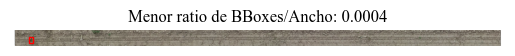

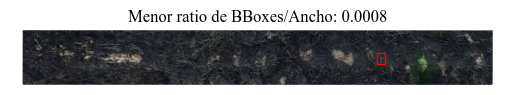

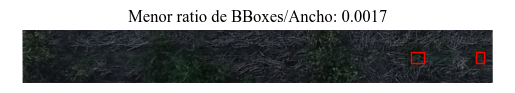

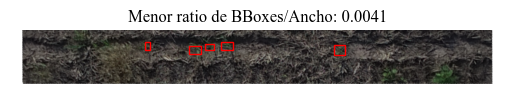

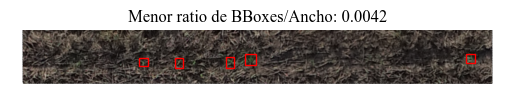

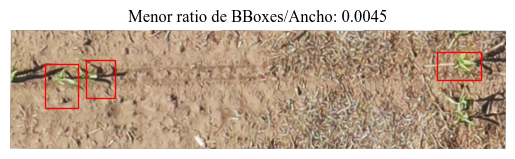

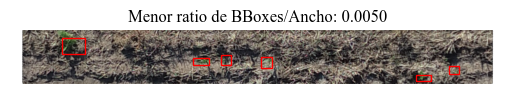

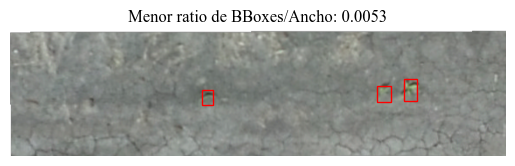

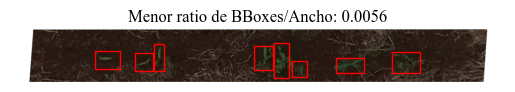

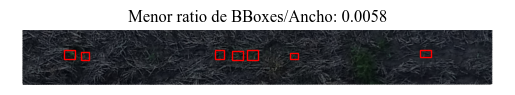

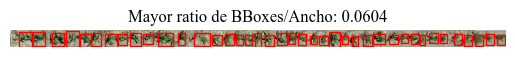

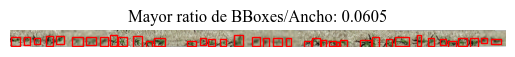

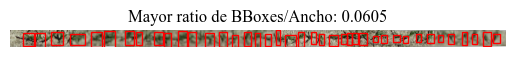

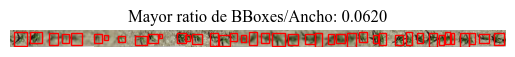

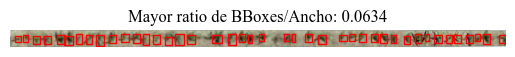

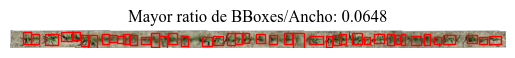

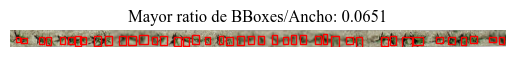

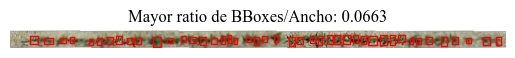

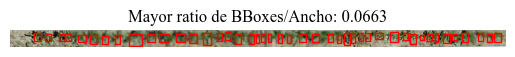

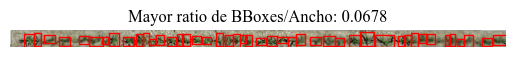

In [7]:
# Lista para almacenar el número de bounding boxes normalizado por el ancho y la información de la imagen correspondiente
image_bboxes_ratio = []

# Procesar cada entrada en los datos
for item in data:
    annotations = item.get('annotations', [])
    if not annotations:  # Excluir imágenes sin bounding boxes
        continue

    image_url = item['item']['slots'][0]['source_files'][0]['url']
    image_width = item['item']['slots'][0]['width']
    image_bboxes = [(anno['bounding_box']['x'], anno['bounding_box']['y'], anno['bounding_box']['w'], anno['bounding_box']['h'])
                    for anno in annotations]

    # Calcular la relación entre el número de bounding boxes y el ancho de la imagen
    if image_width > 0:
        ratio = len(annotations) / image_width
        image_bboxes_ratio.append((ratio, image_url, image_bboxes))

# Ordenar por la relación y seleccionar las diez primeras para la menor relación y las últimas diez para la mayor relación
image_bboxes_ratio.sort(key=lambda x: x[0])
least_images = image_bboxes_ratio[:10]
most_images = image_bboxes_ratio[-10:]

# Función para mostrar imágenes y dibujar bounding boxes
def show_image_with_boxes(image_url, bboxes, title):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(image)
    ax = plt.gca()

    # Dibujar cada bounding box
    for (x, y, w, h) in bboxes:
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.title(title)
    plt.axis('off')
    plt.show()

# Visualizar las imágenes con la menor relación de bounding boxes por ancho de imagen
for ratio, url, bboxes in least_images:
    show_image_with_boxes(url, bboxes, f"Menor ratio de BBoxes/Ancho: {ratio:.4f}")

# Visualizar las imágenes con la mayor relación de bounding boxes por ancho de imagen
for ratio, url, bboxes in most_images:
    show_image_with_boxes(url, bboxes, f"Mayor ratio de BBoxes/Ancho: {ratio:.4f}")


Veamos si hay alguna bounding box que haya sido colocada por error

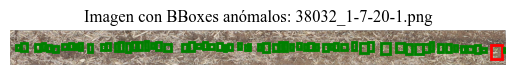

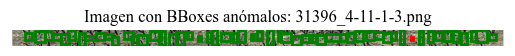

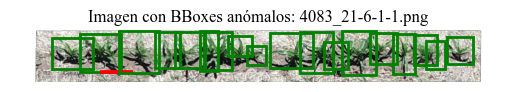

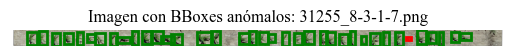

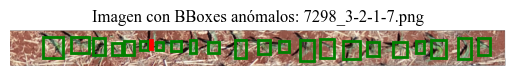

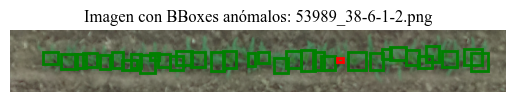

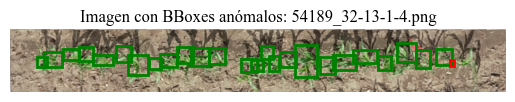

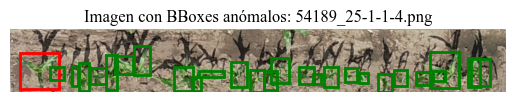

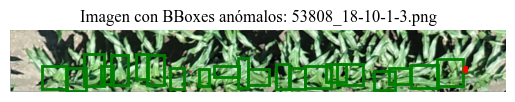

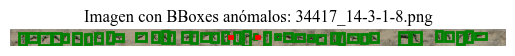

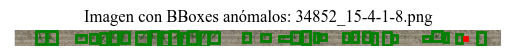

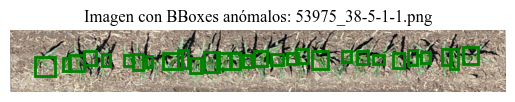

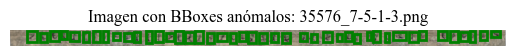

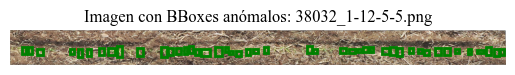

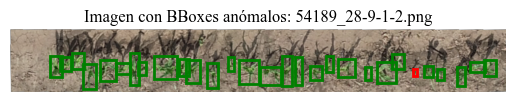

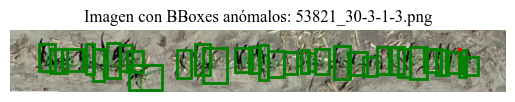

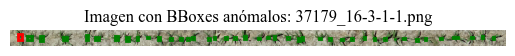

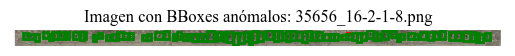

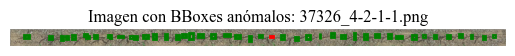

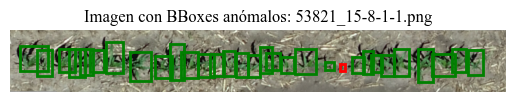

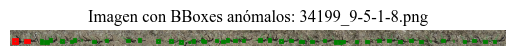

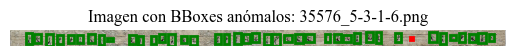

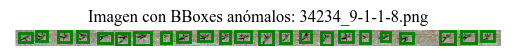

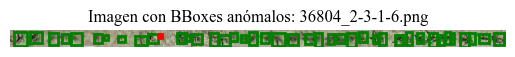

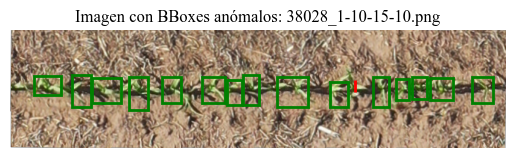

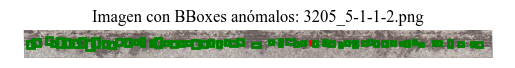

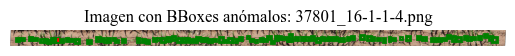

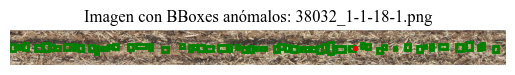

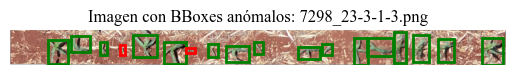

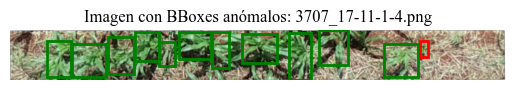

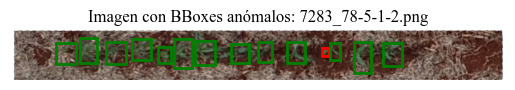

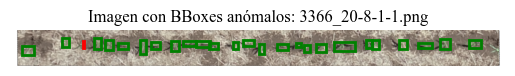

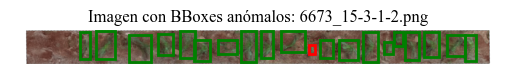

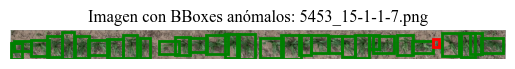

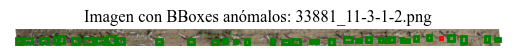

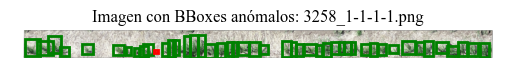

              Image Name        X       Y  Width  Height  Anomalous Area  \
0     38032_1-7-20-1.png  1970.02   58.94  43.93   59.05       2594.0665   
1     31396_4-11-1-3.png  1957.48   33.10  10.30   17.82        183.5460   
2      4083_21-6-1-1.png   240.63  109.31  80.94    0.59         47.7546   
3      31255_8-3-1-7.png  2300.92   40.66  27.66   17.98        497.3268   
4       7298_3-2-1-7.png   391.11   26.57   5.65   26.39        149.1035   
5     53989_38-6-1-2.png   708.24   61.11  14.19    7.64        108.4116   
6    54189_32-13-1-4.png   962.52   65.57   8.66   13.61        117.8626   
7     54189_25-1-1-4.png    21.53   50.11  84.77   80.35       6811.2695   
8    53808_18-10-1-3.png   341.94   78.74   1.08    1.08          1.1664   
9    53808_18-10-1-3.png   866.18   71.19   2.16    7.55         16.3080   
10    34417_14-3-1-8.png  1141.05   32.33  14.88   10.47        155.7936   
11    34417_14-3-1-8.png  1283.12   31.24  14.35   13.43        192.7205   
12    34852_

In [18]:
anomalous_data = []  # Lista para almacenar los detalles de las imágenes con bounding boxes anómalos

# Función para mostrar imágenes y dibujar bounding boxes destacados
def show_image_with_boxes(image_url, bboxes, title):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    plt.figure()
    plt.imshow(image)
    ax = plt.gca()

    # Dibujar cada bounding box
    for (x, y, w, h, anomalous) in bboxes:
        color = 'r' if anomalous else 'g'  # Rojo para anómalos, verde para normales
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)

    plt.title(title)
    plt.axis('off')
    plt.show()

# Analizar cada imagen
for item in data:
    annotations = item.get('annotations', [])
    image_url = item['item']['slots'][0]['source_files'][0]['url']
    image_name = item['item']['name']  # Asumiendo que cada entrada tiene un nombre de imagen

    # Calcular el área de cada bounding box
    areas = []
    bboxes_details = []
    for anno in annotations:
        x, y, w, h = anno['bounding_box']['x'], anno['bounding_box']['y'], anno['bounding_box']['w'], anno['bounding_box']['h']
        area = w * h
        areas.append(area)
        bboxes_details.append((x, y, w, h))

    # Calcular la mediana de las áreas
    if areas:
        median_area = np.median(areas)
        threshold_upper = 5 * median_area
        threshold_lower = 0.15 * median_area

        # Identificar bounding boxes anómalos y recopilar datos
        annotated_bboxes = []
        show = False
        for (x, y, w, h), area in zip(bboxes_details, areas):
            anomalous = area > threshold_upper or area < threshold_lower
            annotated_bboxes.append((x, y, w, h, anomalous))
            if anomalous:
                anomalous_data.append({
                    'Image Name': image_name,
                    'X': x,
                    'Y': y,
                    'Width': w,
                    'Height': h,
                    'Anomalous Area': area,
                    'Median Area': median_area
                })
                show = True

        # Mostrar la imagen si contiene bounding boxes anómalos
        if show:
            show_image_with_boxes(image_url, annotated_bboxes, f"Imagen con BBoxes anómalos: {image_name}")

# Crear un DataFrame con los nombres de las imágenes anómalas y detalles adicionales
df_anomalous_images = pd.DataFrame(anomalous_data)
print(df_anomalous_images)

# Guardar el dataframe en un archivo Excel
df_anomalous_images.to_excel(r'C:\Users\sofia\Documents\PROYECTO FINAL\anomalous_images_details.xlsx', index=False)
